# **Image Processing (part 2)**
**Author = Bayu Aditya**

Perkenalan dengan Module Image Processing OpenCV

-----
# 1. Color Space
-----

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1. BGR to RGB

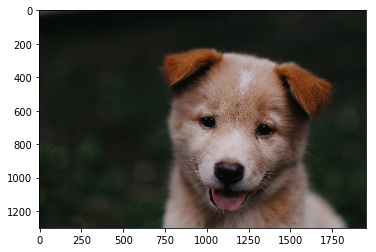

In [4]:
gambar = cv2.imread('DATA/00-puppy.jpg')
gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
plt.imshow(gambar); plt.show()

## 1.2. RGB to HSV (Hue Saturation Value)

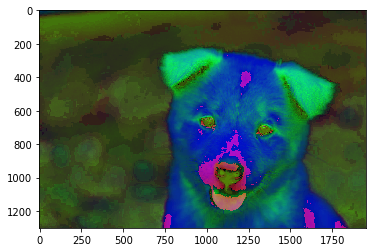

In [5]:
gambarHSV = cv2.cvtColor(gambar, cv2.COLOR_RGB2HSV)
plt.imshow(gambarHSV); plt.show()

## 1.3. RGB to HLS (Hue Light Saturation)

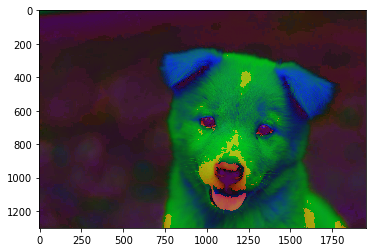

In [6]:
gambarHLS = cv2.cvtColor(gambar, cv2.COLOR_RGB2HLS)
plt.imshow(gambarHLS); plt.show()

-----
# 2. Blending and Pasting Images
-----

## 2.1. Blending dengan ukuran yang sama

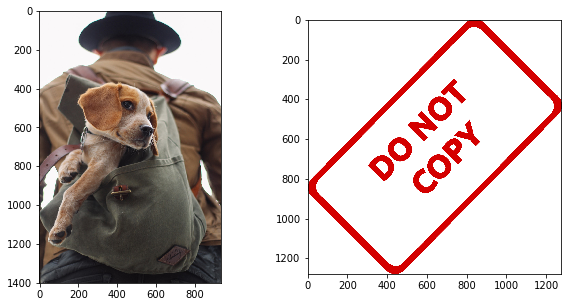

In [16]:
gambar1 = cv2.imread('DATA/dog_backpack.jpg')
gambar2 = cv2.imread('DATA/watermark_no_copy.png')

gambar1 = cv2.cvtColor(gambar1, cv2.COLOR_BGR2RGB)
gambar2 = cv2.cvtColor(gambar2, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(gambar1)
ax2.imshow(gambar2); plt.show()

In [13]:
gambar1 = cv2.resize(gambar1, dsize = (600,600))
gambar2 = cv2.resize(gambar2, dsize = (600,600))

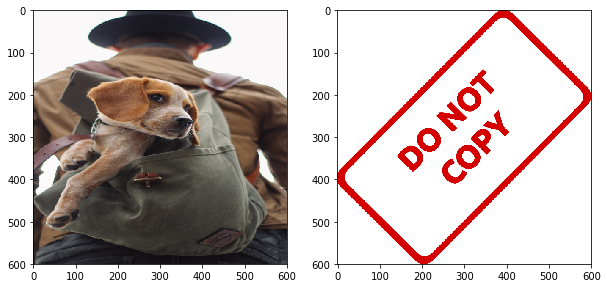

In [14]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(gambar1)
ax2.imshow(gambar2); plt.show()

Persamaan blended adalah : $$result = img1*\alpha + img2*\beta + \gamma$$

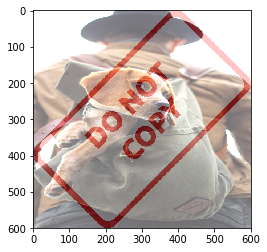

In [15]:
blended = cv2.addWeighted(src1 = gambar1, alpha = 0.8,
                          src2 = gambar2, beta = 0.4, gamma = 0)
plt.imshow(blended); plt.show()

## 2.2. Overlaying images dengan ukuran yang berbeda

In [23]:
gambar1 = cv2.imread('DATA/dog_backpack.jpg')
gambar2 = cv2.imread('DATA/watermark_no_copy.png')

gambar1 = cv2.cvtColor(gambar1, cv2.COLOR_BGR2RGB)
gambar2 = cv2.cvtColor(gambar2, cv2.COLOR_BGR2RGB)

gambar2 = cv2.resize(gambar2, (600,600))

In [25]:
print('Ukuran gambar 1 : ',gambar1.shape, '\n','Ukuran gambar 2 : ',gambar2.shape)

Ukuran gambar 1 :  (1401, 934, 3) 
 Ukuran gambar 2 :  (600, 600, 3)


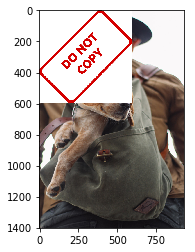

In [26]:
gambar_overlay = gambar1.copy()

x_offset, y_offset = 0, 0

gambar_overlay[x_offset : x_offset+gambar2.shape[0],
             y_offset : y_offset+gambar2.shape[1]] = gambar2
plt.imshow(gambar_overlay)

## 2.3. Blending Image dengan ukuran yang berbeda

In [31]:
gambar1 = cv2.imread('DATA/dog_backpack.jpg')
gambar2 = cv2.imread('DATA/watermark_no_copy.png')

gambar1 = cv2.cvtColor(gambar1, cv2.COLOR_BGR2RGB)
gambar2 = cv2.cvtColor(gambar2, cv2.COLOR_BGR2RGB)

gambar2 = cv2.resize(gambar2, (600,600))

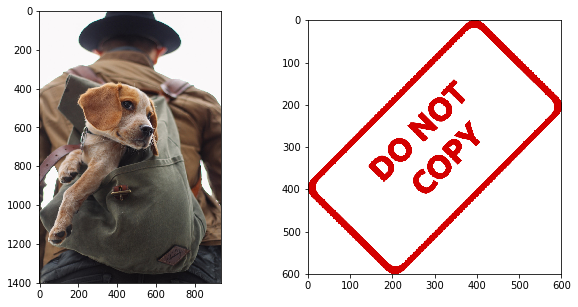

In [32]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(gambar1)
ax2.imshow(gambar2); plt.show()

**Membuat daerah ROI**

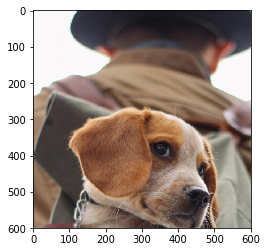

In [35]:
x_offset, y_offset = 100, 100

roi = gambar1[x_offset : x_offset+gambar2.shape[0],
              y_offset : y_offset+gambar2.shape[1]]
plt.imshow(roi)

**Membuat Mask**

Ukuran gambar2gray :  (600, 600)


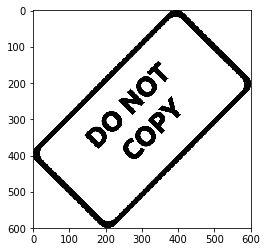

In [40]:
gambar2gray = cv2.cvtColor(gambar2, cv2.COLOR_RGB2GRAY)
print('Ukuran gambar2gray : ',gambar2gray.shape)
plt.imshow(gambar2gray, cmap = 'gray'); plt.show()

Ukuran gambar2gray_inv :  (600, 600)


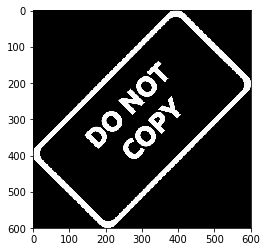

In [43]:
gambar2gray_inv = cv2.bitwise_not(gambar2gray)
print('Ukuran gambar2gray_inv : ', gambar2gray_inv.shape)
plt.imshow(gambar2gray_inv, cmap = 'gray'); plt.show()

**Mengubah mask menjadi 3 channel**

In [46]:
putih = np.full(gambar2.shape, 255, dtype = np.uint8)
print('Ukuran Putih :', putih.shape)

Ukuran Putih : (600, 600, 3)


(600, 600, 3)


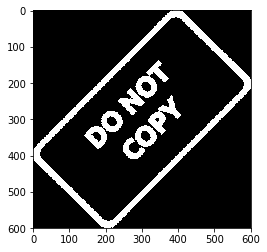

In [55]:
channel3 = cv2.bitwise_or(putih, putih, mask = gambar2gray_inv)
print(channel3.shape)
plt.imshow(channel3); plt.show()

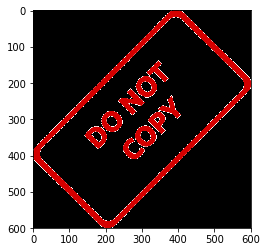

In [62]:
channel3red = cv2.bitwise_and(gambar2, gambar2, mask = gambar2gray_inv)
plt.imshow(channel3red)

**Menggabungkan Channel 3 Mask dengan ROI**

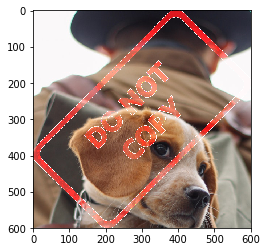

In [67]:
final_roi = cv2.bitwise_or(roi, channel3red)
plt.imshow(final_roi); plt.show()

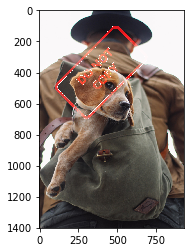

In [69]:
hasil = gambar1.copy()
hasil[x_offset : x_offset+gambar2.shape[0],
      y_offset : y_offset+gambar2.shape[1]] = final_roi

plt.imshow(hasil); plt.show()

-----
# 3. Image Threesold
-----